In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 50
Nx = 10
Ny = 10

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

k = 0.075

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

0.1239795918367347 0.1239795918367347


#### Condicion Inicial
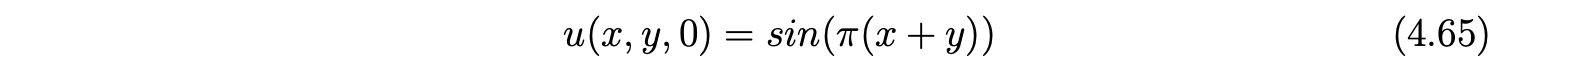

In [3]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [4]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    #T[:,:,0] = 10.
    #T[:,-1,:] = 5.
    
    return T

#### Condiciones de Frontera
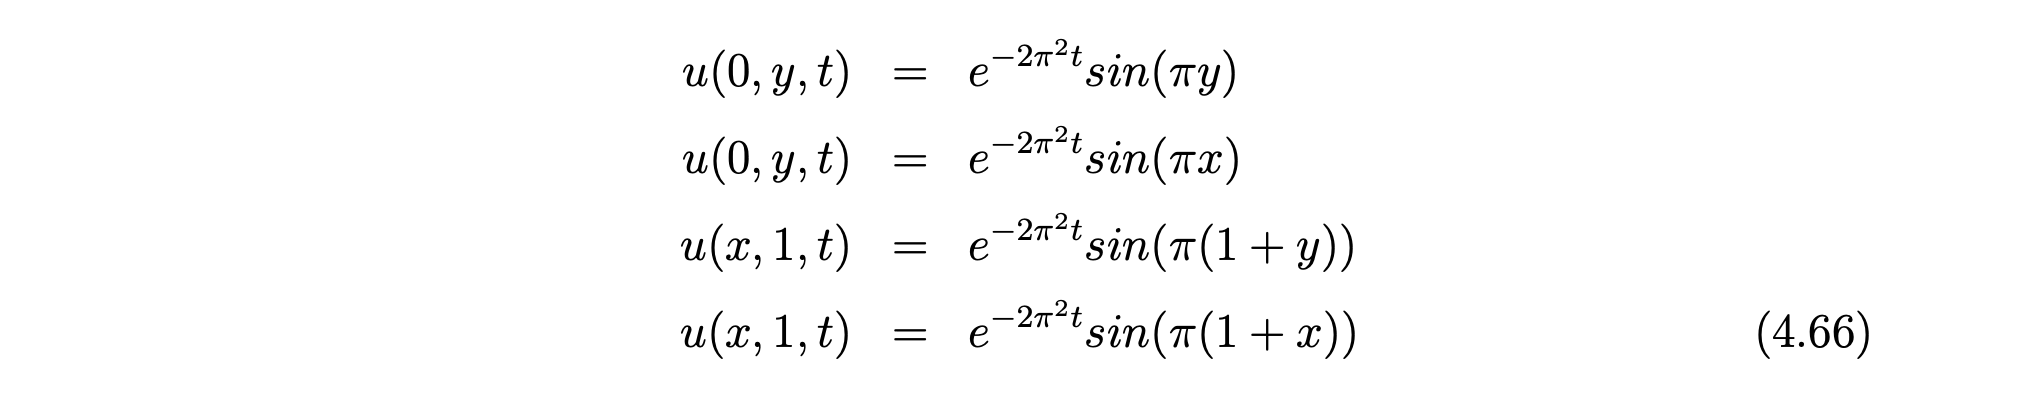

In [5]:
def cond1(t): # u(0,y,t)
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*y)

def cond2(t): # u(0,y,t)
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*x)

def cond3(t): # u(x,1,t)
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+y))

def cond4(t): # u(x,1,t)
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(1+x))

In [6]:
T = InitT()
#print(T[0,:,:])

In [7]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        #T[l,0,:] = np.sin(20*t[l])
        
        # CONDICIONES DE FRONTERA
        ## Condiciones en y
        T[l,0,:] = cond1(l) 
        T[l,-1,:] = cond3(l)
        ## Condiciones en x
        T[l,:,0] = cond2(l) 
        T[l,:,-1] = cond4(l)
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])


In [8]:
GetSolution()

100%|████████████████████████████████████████| 49/49 [00:00<00:00, 10409.81it/s]


<IPython.core.display.Javascript object>


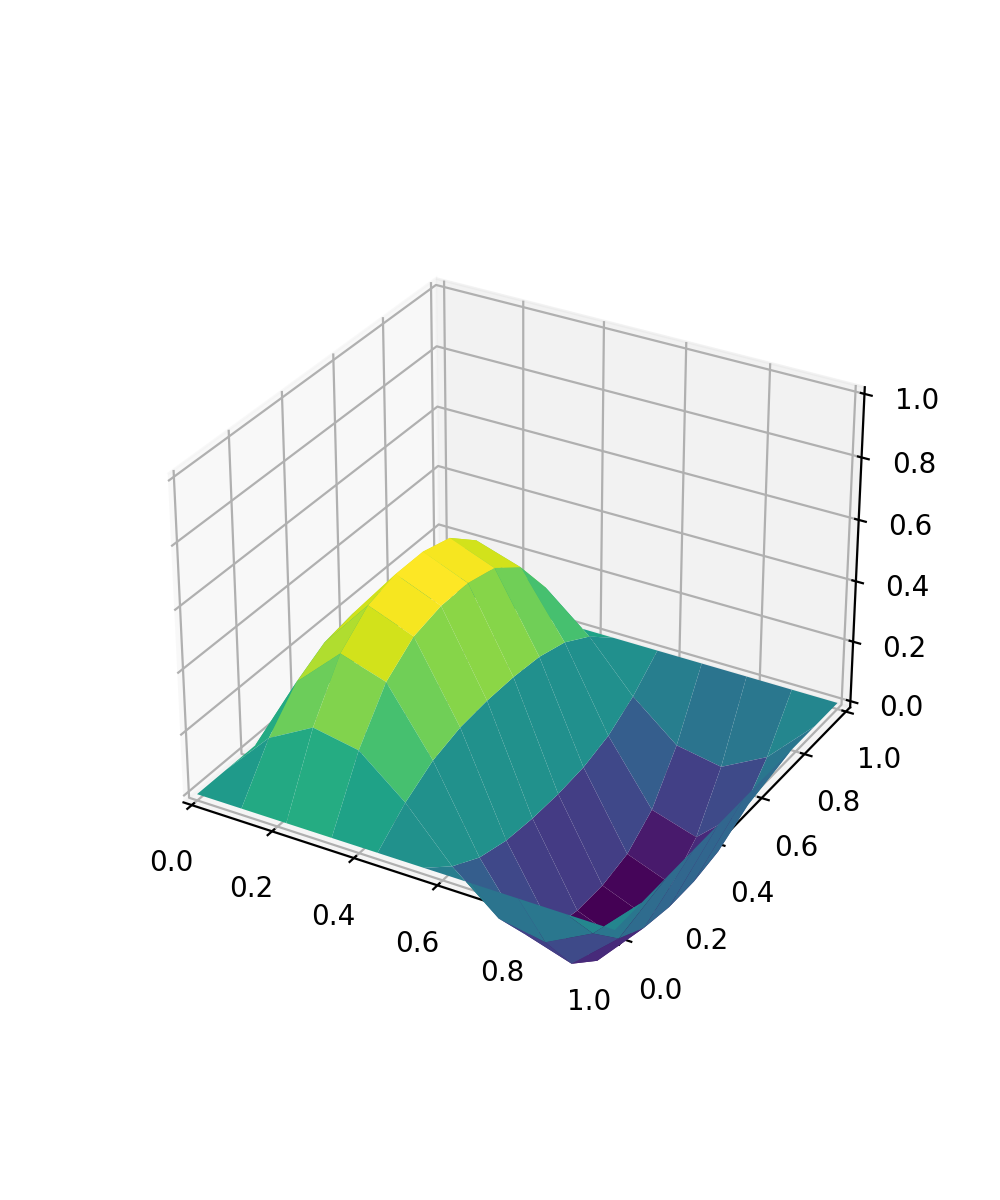

In [9]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,1)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)